# pyhf hello world 3

Ryan Reece <https://github.com/rreece>        
created: 2020-07-09

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pyhf

import hepplot as hep

## Setup input data

In [2]:
#bins = list(range(6))
#y = [ [9,8,6,4,1], [12,10,7,2,2], [6,10,8,5,2] ]
#data = [26, 30, 19, 12, 6]
#signals = [
#    [0.2, 0.6, 0.7, 1.1, 0.5],
#    [0.2, 0.6, 0.7, 1.1, 0.5],
#    [0.2, 0.6, 0.7, 1.1, 0.5],
#    [0.2, 0.6, 0.7, 1.1, 0.5],
#    ]

bins = list(range(4))
y = [ [6,4,1], [7,2,2], [8,5,2] ]
data = [19, 12, 6]
signals = [
    [0.7, 1.1, 0.5],
    [0.7, 1.1, 0.5],
    [0.7, 1.1, 0.5],
    [0.7, 1.1, 0.5],
    ]

labels = ['A','B','C']
data_label='Data'
signal_labels = ['signal', r'signal $\times2$', r'signal $\times4$', r'signal $\times8$']

for i_signal in range(len(signals)):
    for j_bin in range(len(signals[i_signal])):
        signals[i_signal][j_bin] = signals[i_signal][j_bin]*(2**i_signal)

ytotal  = [sum(i) for i in zip(*y)]

## gaussian errors
yerr    = [
    0.2*math.sqrt(_y) for _y in ytotal
]
yerrs   = [
    [0.1*math.sqrt(_y) for _y in y_i] for y_i in y
]

## asymmetric errors
#yerr    = [
#    [0.2*hep.stat.poisson_error_up(_y), 0.2*hep.stat.poisson_error_down(_y)] for _y in ytotal
#]
#yerrs   = [
#    [[0.3*math.sqrt(_y), 0.2*math.sqrt(_y)] for _y in y_i] for y_i in y
#]

## Histograms

(<Figure size 720x720 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x121612be0>])

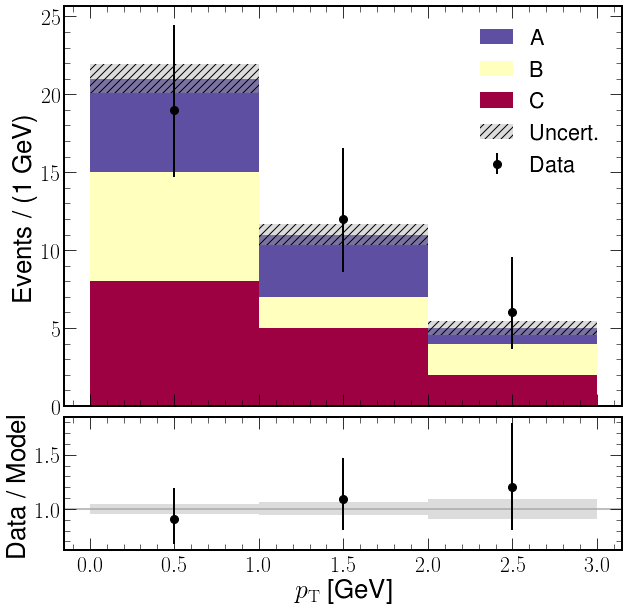

In [3]:
hep.plot.hist1d(bins, y, yerr=yerr, labels=labels, data=data, data_label=data_label, ratio=True, xlabel='$p_\mathrm{T}$', ylabel='Events', unit='GeV')

(<Figure size 720x720 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x121cf9208>])

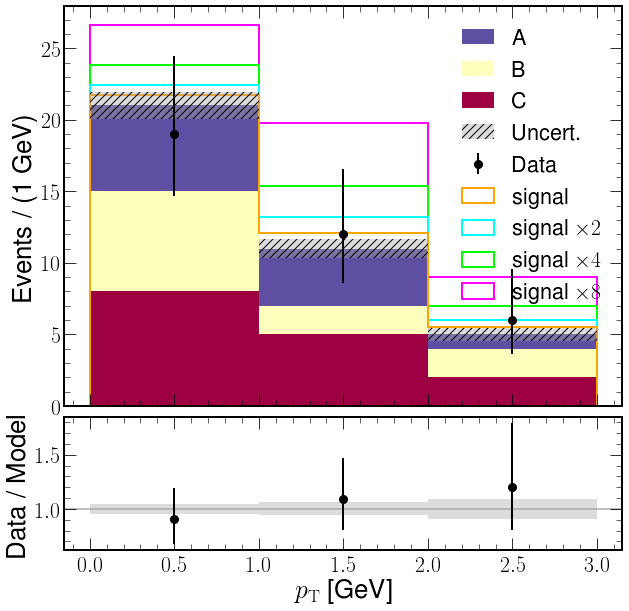

In [4]:
hep.plot.hist1d(bins, y, yerr=yerr, labels=labels, data=data, data_label=data_label, signals=signals, signal_labels=signal_labels, ratio=True, xlabel='$p_\mathrm{T}$', ylabel='Events', unit='GeV')

## Hypothesis testing with pyhf

### TODO:

-   Explain `pyhf.simplemodels.hepdata_like`
    -   Marked Poisson
    -   Cranmer, K. et al. (2012). HistFactory: A tool for creating statistical models for use with RooFit and RooStats. CERN-OPEN-2012-016. <https://cds.cern.ch/record/1456844>

In [5]:
def make_pdf(bkg_data, bkg_uncerts, signal_data):
    pdf = pyhf.simplemodels.hepdata_like(signal_data=signal_data, bkg_data=bkg_data, bkg_uncerts=bkg_uncerts)
    return pdf
    
def hypo_test(pdf, poi, data, init_pars=None, par_bounds=None):
    if init_pars is None:
        init_pars = pdf.config.suggested_init()
    if par_bounds is None:
        par_bounds = pdf.config.suggested_bounds()
    CLs_obs, CLs_exp_band = pyhf.infer.hypotest(poi,
                                                data + pdf.config.auxdata,
                                                pdf,
                                                init_pars,
                                                par_bounds,
                                                return_expected_set=True)
    return CLs_obs, CLs_exp_band

In [6]:
list_of_results = list()
for i_signal, signal in enumerate(signals):
    print('Testing signal %i' % (i_signal+1))
    pdf = make_pdf(bkg_data=ytotal, bkg_uncerts=yerr, signal_data=signal)
    CLs_obs, CLs_exp_band = hypo_test(pdf=pdf, poi=1.0, data=data)
    results = dict()
    results['pdf'] = pdf
    results['CLs_obs'] = CLs_obs
    results['CLs_exp_band'] = CLs_exp_band
    list_of_results.append(results)
    print('Expected CLs -2 sigma: %.4f' % (CLs_exp_band[0]))
    print('Expected CLs -1 sigma: %.4f' % (CLs_exp_band[1]))
    print('Expected CLs         : %.4f' % (CLs_exp_band[2]))
    print('Expected CLs +1 sigma: %.4f' % (CLs_exp_band[3]))
    print('Expected CLs +2 sigma: %.4f' % (CLs_exp_band[4]))
    print('Observed CLs         : %.4f' % (CLs_obs))
    print('')

Testing signal 1
Expected CLs -2 sigma: 0.3526
Expected CLs -1 sigma: 0.5016
Expected CLs         : 0.6834
Expected CLs +1 sigma: 0.8595
Expected CLs +2 sigma: 0.9663
Observed CLs         : 0.7372

Testing signal 2
Expected CLs -2 sigma: 0.1139
Expected CLs -1 sigma: 0.2288
Expected CLs         : 0.4264
Expected CLs +1 sigma: 0.6906
Expected CLs +2 sigma: 0.9064
Observed CLs         : 0.4962

Testing signal 3
Expected CLs -2 sigma: 0.0095
Expected CLs -1 sigma: 0.0371
Expected CLs         : 0.1288
Expected CLs +1 sigma: 0.3588
Expected CLs +2 sigma: 0.7007
Observed CLs         : 0.1731

Testing signal 4
Expected CLs -2 sigma: 0.0000
Expected CLs -1 sigma: 0.0004
Expected CLs         : 0.0050
Expected CLs +1 sigma: 0.0420
Expected CLs +2 sigma: 0.2144
Observed CLs         : 0.0085



In [7]:
results = list_of_results[2]
pdf = results['pdf']

In [8]:
best_fit = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf)

In [9]:
best_fit

array([0.17602548, 0.99553126, 1.00073021, 1.00469279])

In [10]:
nominal = pdf.config.suggested_init()
background_only = pdf.config.suggested_init()
background_only[pdf.config.poi_index] = 0.0
best_fit = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf)

In [11]:
nominal

[1.0, 1.0, 1.0, 1.0]

In [12]:
background_only

[0.0, 1.0, 1.0, 1.0]

In [13]:
par_bounds = pdf.config.suggested_bounds()

In [14]:
par_bounds

[(0, 10), (1e-10, 10.0), (1e-10, 10.0), (1e-10, 10.0)]

In [15]:
unconpars = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf, nominal, par_bounds)
print("parameters post unconstrained fit: {}".format(unconpars))

parameters post unconstrained fit: [0.17602548 0.99553126 1.00073021 1.00469279]


In [16]:
conpars = pyhf.infer.mle.fixed_poi_fit(0.0, data + pdf.config.auxdata, pdf, nominal, par_bounds)
print("parameters post constrained fit: {}".format(conpars))

parameters post constrained fit: [0.         0.99633703 1.00349644 1.00769269]


In [17]:
pdf.expected_data(conpars)

array([ 20.92307761,  11.03846084,   5.03846346, 523.07694023,
       275.96152097, 125.96158645])

In [18]:
test_mus = np.linspace(0, 5, 61)
hypo_tests = [
    hypo_test(pdf, poi_test, data)
    for poi_test in test_mus
]
cls_obs = np.array([test[0] for test in hypo_tests]).flatten()
cls_exp = [np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)]

In [19]:
def plot_results(test_mus, cls_obs, cls_exp, test_size=0.05):
    plt.plot(test_mus, cls_obs, c="k")
    for i, c in zip(range(5), ["grey", "grey", "grey", "grey", "grey"]):
        plt.plot(test_mus, cls_exp[i], c=c)
    plt.plot(test_mus, [test_size] * len(test_mus), c="r")
    plt.ylim(0, 1)

def invert_interval(test_mus, cls_obs, cls_exp, test_size=0.05):
    crossing_test_stats = {"exp": [], "obs": None}
    for cls_exp_sigma in cls_exp:
        crossing_test_stats["exp"].append(
            np.interp(
                test_size, list(reversed(cls_exp_sigma)), list(reversed(test_mus))
            )
        )
    crossing_test_stats["obs"] = np.interp(
        test_size, list(reversed(cls_obs)), list(reversed(test_mus))
    )
    return crossing_test_stats

{'exp': [0.6732204089813978,
  0.9242451041741733,
  1.3268873949680164,
  1.9343722501728045,
  2.7367373494841485],
 'obs': 1.4600439208850498}

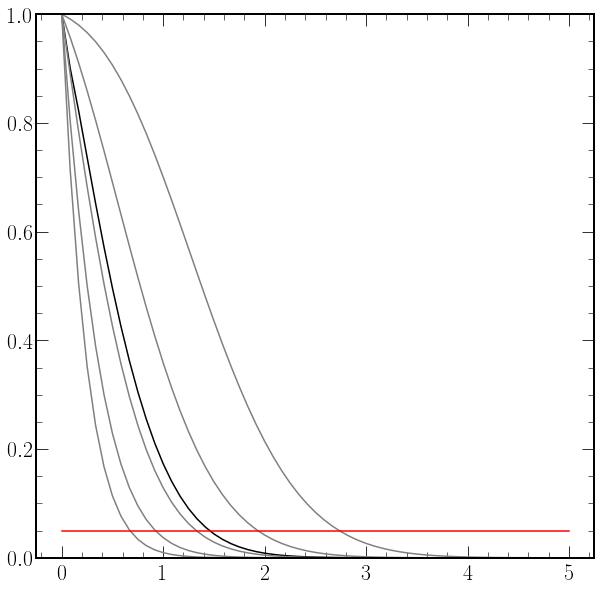

In [20]:
print("\n")
plot_results(test_mus, cls_obs, cls_exp)
invert_interval(test_mus, cls_obs, cls_exp)

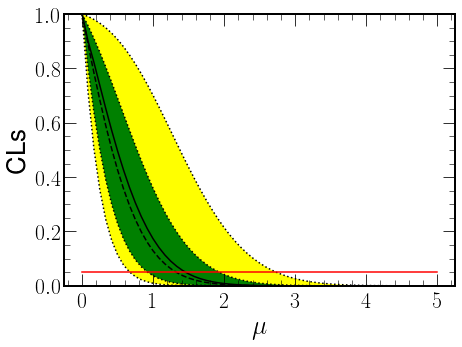

In [21]:
import pyhf.contrib.viz.brazil

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)

#ax1.set_title(u"Hypothesis Tests")
ax1.set_ylabel('CLs')
ax1.set_xlabel(r'$\mu$')

pyhf.contrib.viz.brazil.plot_results(ax1, test_mus, hypo_tests);

## See also

-   Cowan, G. et al. (2010). Asymptotic formulae for likelihood-based tests of new physics. https://arxiv.org/abs/1007.1727
-   Cranmer, K. et al. (2012). HistFactory: A tool for creating statistical models for use with RooFit and RooStats. CERN-OPEN-2012-016. <https://cds.cern.ch/record/1456844>
-   Heinrich, L., Feickert, M., & Stark, G. (2018). <https://scikit-hep.org/pyhf/>
-   Feickert, M. (2018). pyhf: a pure Python implementation of HistFactory with tensors and autograd. <https://indico.cern.ch/event/759480/>
-   <https://github.com/CoffeaTeam/coffea/blob/master/coffea/hist/plot.py>
-   <https://scikit-hep.org/pyhf/examples/notebooks/binderexample/StatisticalAnalysis.html>